**Austin Traffic Data**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
from matplotlib import pyplot as plt
import numpy as np
!pip install matrixprofile 
import matrixprofile as mp

     |████████████████████████████████| 1.1MB 26.3MB/s 
     |████████████████████████████████| 1.3MB 30.5MB/s 
ERROR: tensorflow-metadata 1.1.0 has requirement protobuf<4,>=3.13, but you'll have protobuf 3.11.2 which is incompatible.
ERROR: googleapis-common-protos 1.53.0 has requirement protobuf>=3.12.0, but you'll have protobuf 3.11.2 which is incompatible.
ERROR: google-api-core 1.26.3 has requirement protobuf>=3.12.0, but you'll have protobuf 3.11.2 which is incompatible.
  Found existing installation: protobuf 3.17.3
    Uninstalling protobuf-3.17.3:
      Successfully uninstalled protobuf-3.17.3


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns
import glob
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
import plotly.graph_objs as go
from plotly import tools
from plotly.subplots import make_subplots
import plotly.offline as py


In [4]:


data=df =pd.read_csv('/content/drive/MyDrive/daily_average_road_intersection_traffic_volume[1].csv')  
data

,year,week_of_year,monday,tuesday,wednesday,thursday,friday,saturday,sunday
0,2020,2,NaN,33166.416667,33764.416667,33971.166667,32076.666667,28167.583333,22937.916667
1,2020,3,30811.750000,32568.333333,33294.250000,33111.250000,33615.916667,27358.250000,24283.166667
2,2020,4,31248.416667,34918.000000,31111.000000,34153.000000,35641.916667,28303.833333,24479.083333
3,2020,5,33044.416667,33591.333333,34893.666667,35061.083333,36128.083333,29905.750000,24435.666667
4,2020,6,33657.333333,34274.083333,33996.583333,34925.500000,36684.166667,29777.000000,22236.750000
...,...,...,...,...,...,...,...,...,...
62,2021,11,23230.714286,23183.285714,24098.857143,24803.857143,25985.000000,23129.571429,19230.857143
63,2021,12,25899.333333,21727.500000,24844.142857,30712.750000,32193.125000,23505.857143,23018.375000
64,2021,13,24616.857143,29582.875000,30693.125000,26878.571429,31486.125000,21356.428571,16289.857143
65,2021,14,24499.857143,24615.000000,24683.571429,24832.714286,26124.571429,23013.428571,19079.142857


**Filling missing values**

In [5]:

data['monday'].fillna(value=24165.405893, inplace=True)
data['tuesday'].fillna(value=24961.200737, inplace=True)
data['wednesday'].fillna(value=25315.679089, inplace=True)
data['thursday'].fillna(value=25260.732173, inplace=True)
data['friday'].fillna(value=26322.776365, inplace=True)
data['saturday'].fillna(value=22405.154244, inplace=True)
data['sunday'].fillna(value=18729.522118, inplace=True)

In [6]:
data.drop_duplicates(inplace=True)

In [7]:
data.head(10)
df=data
df.head(66)

,year,week_of_year,monday,tuesday,wednesday,thursday,friday,saturday,sunday
0,2020,2,24165.405893,33166.416667,33764.416667,33971.166667,32076.666667,28167.583333,22937.916667
1,2020,3,30811.750000,32568.333333,33294.250000,33111.250000,33615.916667,27358.250000,24283.166667
2,2020,4,31248.416667,34918.000000,31111.000000,34153.000000,35641.916667,28303.833333,24479.083333
3,2020,5,33044.416667,33591.333333,34893.666667,35061.083333,36128.083333,29905.750000,24435.666667
4,2020,6,33657.333333,34274.083333,33996.583333,34925.500000,36684.166667,29777.000000,22236.750000
...,...,...,...,...,...,...,...,...,...
61,2021,10,24389.000000,24111.285714,24642.571429,25086.571429,27107.142857,23904.000000,17471.714286
62,2021,11,23230.714286,23183.285714,24098.857143,24803.857143,25985.000000,23129.571429,19230.857143
63,2021,12,25899.333333,21727.500000,24844.142857,30712.750000,32193.125000,23505.857143,23018.375000
64,2021,13,24616.857143,29582.875000,30693.125000,26878.571429,31486.125000,21356.428571,16289.857143


**For clustering 7 features are considered viz days of the week**

In [8]:
x = data[['sunday','monday','tuesday','wednesday','thursday','friday','saturday']].values

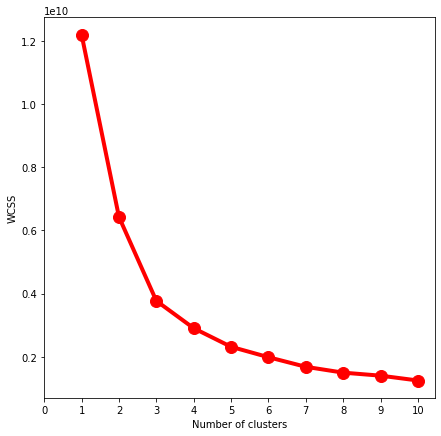

In [9]:

WCSS = []
for i in range(1,11):
    model = KMeans(n_clusters = i,init = 'k-means++')
    model.fit(x)
    WCSS.append(model.inertia_)
fig = plt.figure(figsize = (7,7))
plt.plot(range(1,11),WCSS, linewidth=4, markersize=12,marker='o',color = 'red')
plt.xticks(np.arange(11))
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

**From here optimal number of clusters came out as 4.**

In [10]:
model = KMeans(n_clusters = 4, init = "k-means++", max_iter = 300, n_init = 10, random_state = 0)
y_clusters = model.fit_predict(x)

**These are the cluster centers for all the four clusters**

In [11]:
model.cluster_centers_

array([[23312.09166667, 31410.11602708, 34528.71666667, 34352.9969697 ,
        35229.63863636, 36160.85378788, 29063.46666667],
       [19184.91801195, 23876.58078884, 24079.84225429, 24780.03304634,
        25115.99347763, 26559.36561796, 22621.74018971],
       [12693.5101666 , 20550.42263989, 21475.6710266 , 21148.25383493,
        18589.14206623, 17302.54779942, 15707.7209596 ],
       [18807.14285714,  4480.25      ,  7288.        ,  4888.25      ,
         5472.4       , 16518.        , 19747.42857143]])

In [12]:
model.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 2, 3, 1, 1, 1, 1, 1, 1, 1,
       2], dtype=int32)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



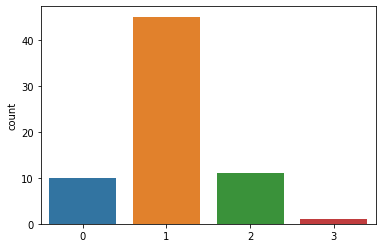

In [13]:
sns.countplot(y_clusters)

In [14]:

unique, counts = np.unique(model.labels_, return_counts=True)

In [15]:
dict_data = dict(zip(unique, counts))
dict_data

{0: 10, 1: 45, 2: 11, 3: 1}

In [16]:
data["cluster"] = model.labels_

In [17]:
model.inertia_

2908860694.532536

**In this table the cluster corresponding to each week has been shown in a column**

In [18]:
data.head(50)

,year,week_of_year,monday,tuesday,wednesday,thursday,friday,saturday,sunday,cluster
0,2020,2,24165.405893,33166.416667,33764.416667,33971.166667,32076.666667,28167.583333,22937.916667,0
1,2020,3,30811.750000,32568.333333,33294.250000,33111.250000,33615.916667,27358.250000,24283.166667,0
2,2020,4,31248.416667,34918.000000,31111.000000,34153.000000,35641.916667,28303.833333,24479.083333,0
3,2020,5,33044.416667,33591.333333,34893.666667,35061.083333,36128.083333,29905.750000,24435.666667,0
4,2020,6,33657.333333,34274.083333,33996.583333,34925.500000,36684.166667,29777.000000,22236.750000,0
5,2020,7,32596.166667,32916.083333,33823.833333,36364.333333,36591.583333,28695.666667,24955.750000,0
6,2020,8,33654.545455,34235.750000,34390.583333,36630.000000,39295.454545,30123.166667,24055.333333,0
7,2020,9,36007.636364,38372.000000,36665.416667,35568.636364,38603.500000,32033.083333,25602.333333,0
8,2020,10,34750.083333,35648.500000,35645.636364,36287.750000,38024.000000,31191.333333,22380.500000,0
9,2020,11,24165.405893,35596.666667,35944.583333,36223.666667,34947.250000,25079.000000,17754.416667,0


**This is a simple plot of week number wrt cluster to which it belong.**

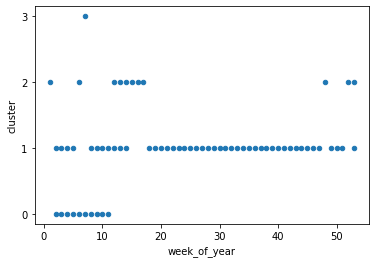

In [19]:
from matplotlib.pyplot import MultipleLocator
ax = plt.gca()

data.plot(kind='scatter',x='week_of_year',y='cluster',ax=ax,marker='o')
y_major_locator=MultipleLocator(1)

ax=plt.gca()

ax.yaxis.set_major_locator(y_major_locator)
plt.show()

**Making Required dataframe for matrix profile analysis**

In [20]:
day=[]
tra=[]
ind=[]

In [21]:
for i in range(63):
  g=i+2
  for j in range(7):
    j=j+2
    day.append(data.columns[j])
    tra.append(data.iloc[i,j])
    
    ind.append(g)
len(ind)

441

In [22]:
len(day)

441

In [23]:
len(tra)

441

In [24]:
lis=[ind,day,tra]

In [25]:
dfinal=pd.DataFrame(list(zip(ind,day,tra)), columns =['Week Number', 'Day','Traffic'])
dfinal

,Week Number,Day,Traffic
0,2,monday,24165.405893
1,2,tuesday,33166.416667
2,2,wednesday,33764.416667
3,2,thursday,33971.166667
4,2,friday,32076.666667
...,...,...,...
436,64,wednesday,24098.857143
437,64,thursday,24803.857143
438,64,friday,25985.000000
439,64,saturday,23129.571429


**I have loaded airport data to extract date column wrt desired week number**

In [26]:
data2=pd.read_excel('/content/drive/MyDrive/Released Records_21FO003112 (1) (1).xlsx')  

In [27]:
data2=data2.sort_values(by=['Date'],ignore_index=True)

In [28]:
dfinal2 = data2.iloc[370:811]
dfinal2

,Date,Austin Bergstrom International (AUS)
370,2020-01-06,21480
371,2020-01-07,18086
372,2020-01-08,18066
373,2020-01-09,20787
374,2020-01-10,21837
...,...,...
806,2021-03-17,12136
807,2021-03-18,13436
808,2021-03-19,12608
809,2021-03-20,10634


In [29]:
date=[]
i=370
for value in dfinal["Day"]:
    date.append(dfinal2.at[i,'Date'])
    i=i+1
dfinal["Date"]=date        

In [30]:
dfinal

,Week Number,Day,Traffic,Date
0,2,monday,24165.405893,2020-01-06
1,2,tuesday,33166.416667,2020-01-07
2,2,wednesday,33764.416667,2020-01-08
3,2,thursday,33971.166667,2020-01-09
4,2,friday,32076.666667,2020-01-10
...,...,...,...,...
436,64,wednesday,24098.857143,2021-03-17
437,64,thursday,24803.857143,2021-03-18
438,64,friday,25985.000000,2021-03-19
439,64,saturday,23129.571429,2021-03-20


In [31]:
dfinal['Date'] = pd.to_datetime(dfinal['Date'])
dfinal = dfinal.set_index('Date').sort_index()

**Simple plot of traffic VS date**

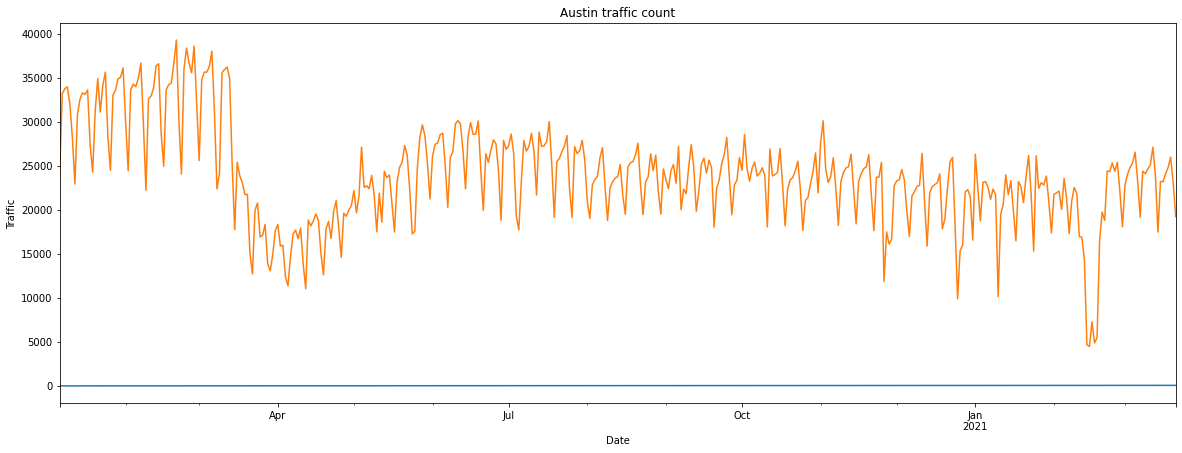

In [32]:
dfinal.plot(figsize=(20,7), legend=None, title='Austin traffic count')
plt.xlabel('Date')
plt.ylabel('Traffic')
plt.show()

**Matrix profile with different window sizes along with anomalies detection**

In [33]:

windows = [
    ('4 Days', 4),
    ('7 Days', 8),
    ('12 Days', 12),
]

profiles = {}

for label, window_size in windows:
    profile = mp.compute(dfinal['Traffic'].values, window_size)
    key = '{} Profile'.format(label)
    profiles[key] = profile

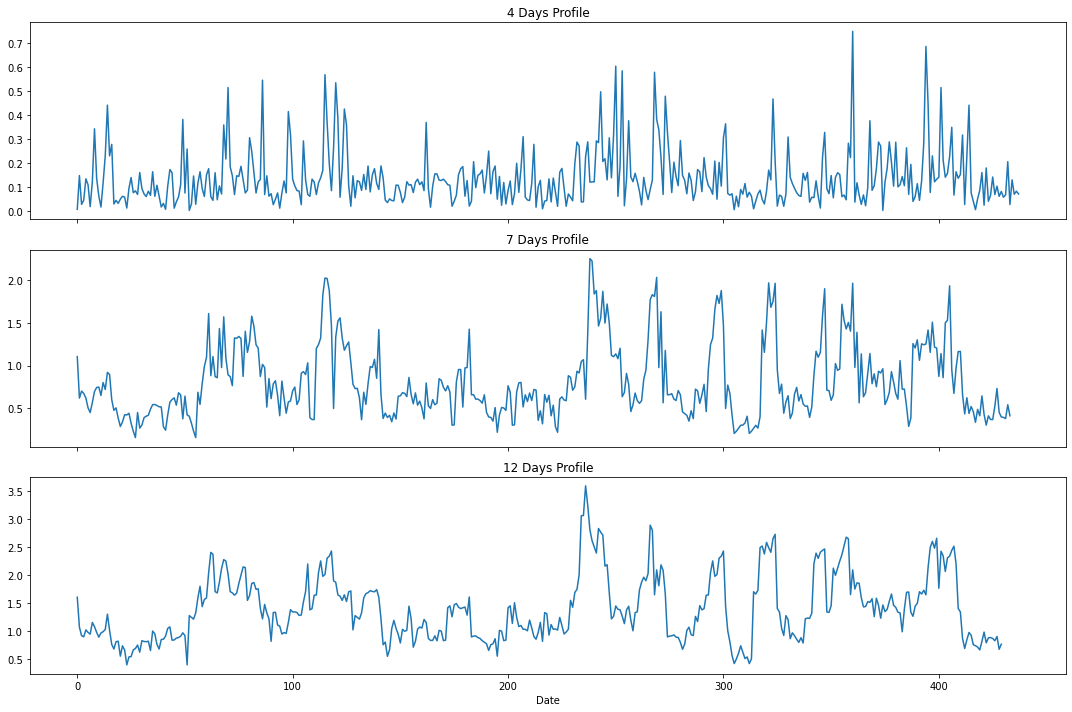

In [34]:
fig, axes = plt.subplots(3,1,sharex=True,figsize=(15,10))

for ax_idx, window in enumerate(windows):
    key = '{} Profile'.format(window[0])
    profile = profiles[key]
    axes[ax_idx].plot(profile['mp'])
    axes[ax_idx].set_title(key)

plt.xlabel('Date')
plt.tight_layout()
plt.show()

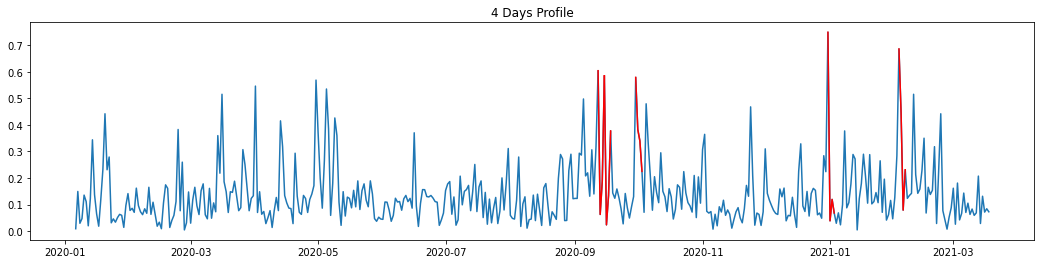

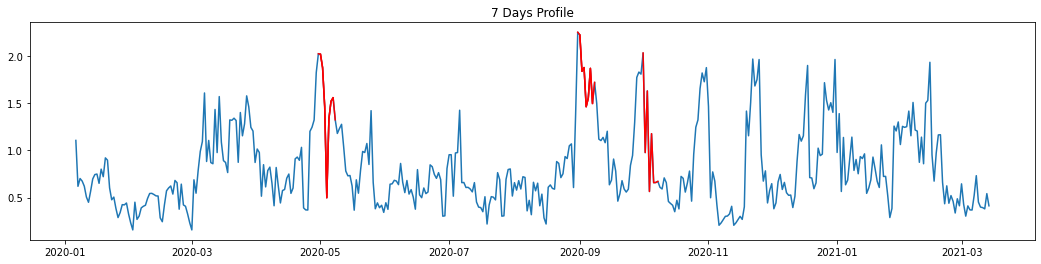

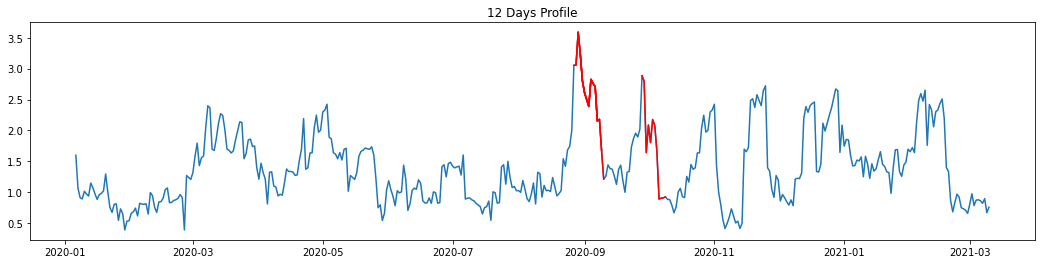

In [35]:
for label, window_size in windows:
    key = '{} Profile'.format(label)
    profiles[key] = mp.discover.discords(profiles[key], k=5)
    
    window_size = profiles[key]['w']
    mp_adjusted = np.append(profiles[key]['mp'], np.zeros(window_size - 1) + np.nan)
    
    plt.figure(figsize=(18,4))
    ax = plt.plot(dfinal.index.values, mp_adjusted)
    plt.title(key)
    
    for start_index in profiles[key]['discords']:
        x = dfinal.index.values[start_index:start_index+window_size]
        y = mp_adjusted[start_index:start_index+window_size]
        plt.plot(x, y, c='r')
    
    plt.show()

In [36]:

key = '7 Days Profile'
profile = profiles[key]
window_size = profile['w']
mp_adjusted = np.append(profile['mp'], np.zeros(window_size - 1) + np.nan)
dfinal[key] = mp_adjusted

**7 days matrix profile with discord detection**

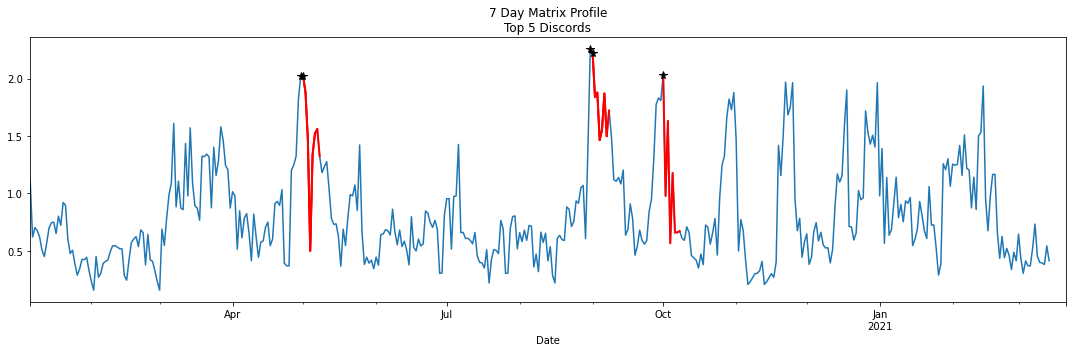

In [37]:
ax = dfinal[key].plot(title='7 Day Matrix Profile\nTop 5 Discords', figsize=(15,5))

for discord in profile['discords']:
    dfinal.iloc[discord:discord+window_size][key].plot(ax=ax, c='r', lw='2')

dfinal.iloc[profile['discords']][key].plot(kind='line', marker='*', c='black', markersize=8, ax=ax, lw=0)
plt.xlabel('Date')
plt.tight_layout()
plt.show()

**Submitted By:** 

**Sakshi Pandey**

**Indian Institute Of Technology, Indore**